In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM,Dense 
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
df=pd.read_csv("D:\\Udemy - Python for Time Series Data Analysis\\TSA_COURSE_NOTEBOOKS\\Data\\UMTMVS.csv",parse_dates=True,index_col=
              'DATE')

In [3]:
df.columns=['Miles_Travelled']

In [4]:
df.head()

,Miles_Travelled
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [5]:
df.index.freq='MS'

<AxesSubplot:xlabel='DATE'>

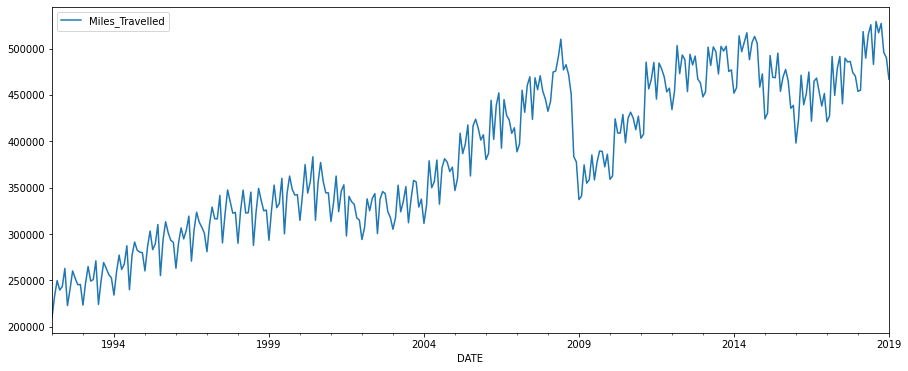

In [6]:
df.plot(figsize=(15,6))

In [7]:
df.describe()

,Miles_Travelled
count,325.000000
mean,381957.273846
std,80728.270329
min,209438.000000
25%,319275.000000
50%,377093.000000
75%,454967.000000
max,529157.000000


In [8]:
scaler=MinMaxScaler()

In [9]:
train=df.iloc[:-12]
test=df.iloc[-12:]

In [10]:
scaler.fit(train)

MinMaxScaler()

In [11]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [12]:
num=12
feat=1

In [13]:
generator=TimeseriesGenerator(data=scaled_train,targets=scaled_train,length=num,batch_size=1)

In [14]:
model=Sequential()

model.add(LSTM(120,activation='relu',input_shape=(num,feat)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 120)               58560     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 121       
Total params: 58,681
Trainable params: 58,681
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit_generator(generator,epochs=25)

Epoch 1/25
301/301 [==============================] - 6s 20ms/step - loss: 0.0274
Epoch 2/25
301/301 [==============================] - 4s 13ms/step - loss: 0.0093
Epoch 3/25
301/301 [==============================] - 6s 19ms/step - loss: 0.0098
Epoch 4/25
301/301 [==============================] - 7s 22ms/step - loss: 0.0077
Epoch 5/25
301/301 [==============================] - 6s 19ms/step - loss: 0.0070
Epoch 6/25
301/301 [==============================] - 6s 21ms/step - loss: 0.0070
Epoch 7/25
301/301 [==============================] - 5s 18ms/step - loss: 0.0073
Epoch 8/25
301/301 [==============================] - ETA: 0s - loss: 0.007 - 7s 23ms/step - loss: 0.0072
Epoch 9/25
301/301 [==============================] - 6s 21ms/step - loss: 0.0058: 1s -
Epoch 10/25
301/301 [==============================] - 6s 19ms/step - loss: 0.0063
Epoch 11/25
301/301 [==============================] - 6s 19ms/step - loss: 0.0056
Epoch 12/25
301/301 [==============================] - 5s 16ms/ste

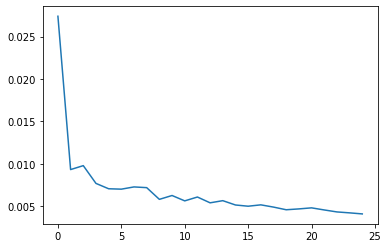

In [17]:
plt.plot(model.history.history['loss'])

## RNN MODEL

In [18]:
test_prediction=[]
first_eval_batch=scaled_train[-num:]
current_batch=first_eval_batch.reshape((1,num,feat))

In [19]:
for i in range(len(test)):
    current_predict=model.predict(current_batch)[0]
    test_prediction.append(current_predict)
    current_batch=np.append(current_batch[:,1:,:],[[current_predict]],axis=1)

In [20]:
test_prediction

[array([0.76265764], dtype=float32),
 array([0.83216393], dtype=float32),
 array([0.78344494], dtype=float32),
 array([0.8209127], dtype=float32),
 array([0.8590561], dtype=float32),
 array([0.8079333], dtype=float32),
 array([0.87325525], dtype=float32),
 array([0.888893], dtype=float32),
 array([0.9018619], dtype=float32),
 array([0.90812206], dtype=float32),
 array([0.9116924], dtype=float32),
 array([0.8889814], dtype=float32)]

In [21]:
y_pred=scaler.inverse_transform(test_prediction)

In [22]:
test['Predictions']=y_pred

<AxesSubplot:xlabel='DATE'>

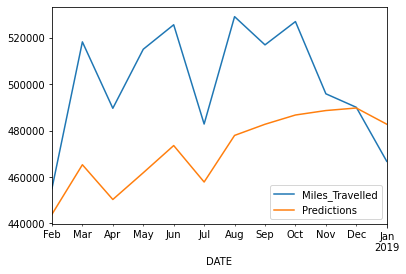

In [23]:
test.plot()

In [24]:
y_pred

array([[443952.93705416],
       [465325.91196454],
       [450344.96903616],
       [461866.19828451],
       [473595.17824042],
       [457875.05701154],
       [477961.37048197],
       [482769.93335235],
       [486757.83052516],
       [488682.80990887],
       [489780.67205119],
       [482797.11414629]])